In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("iris_svm.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [29]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [31]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [6]:
X = df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]].values
y = df["species"].values 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

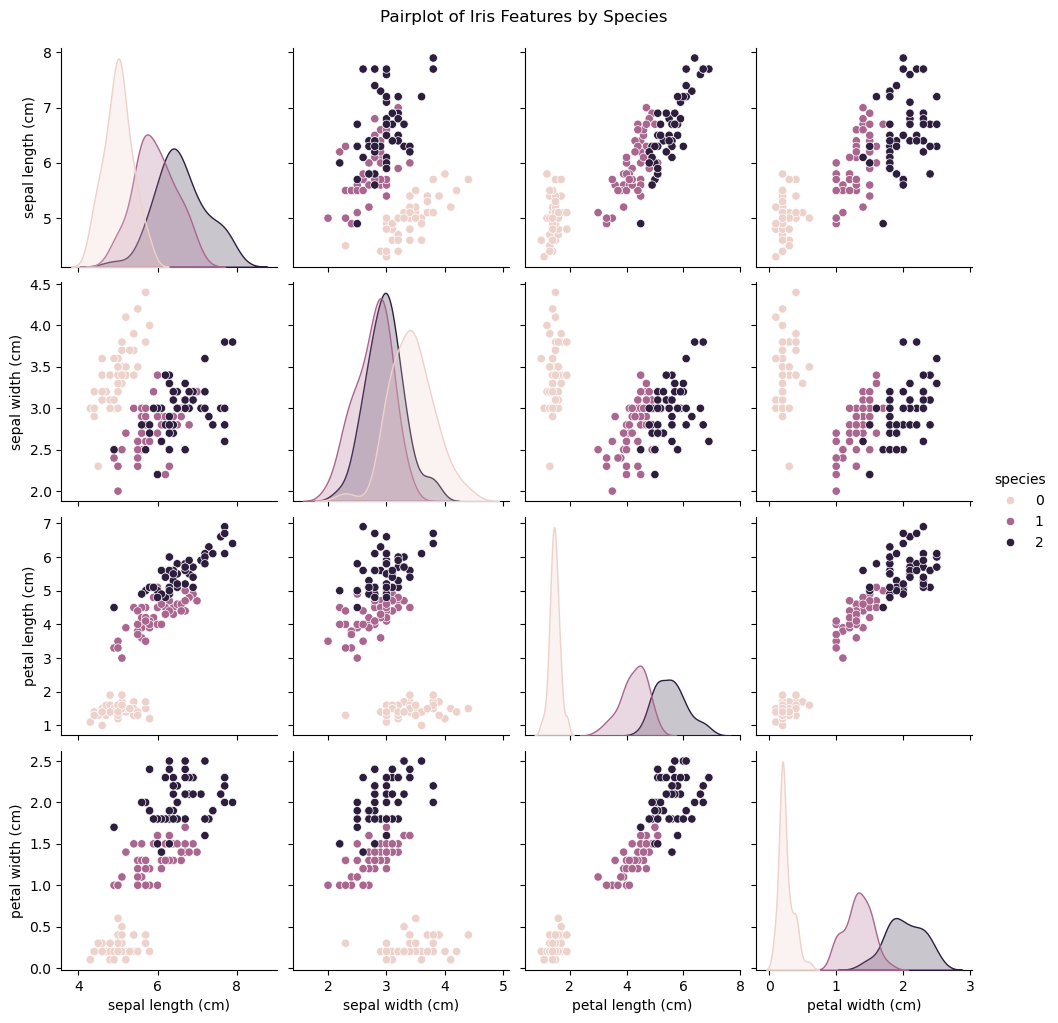

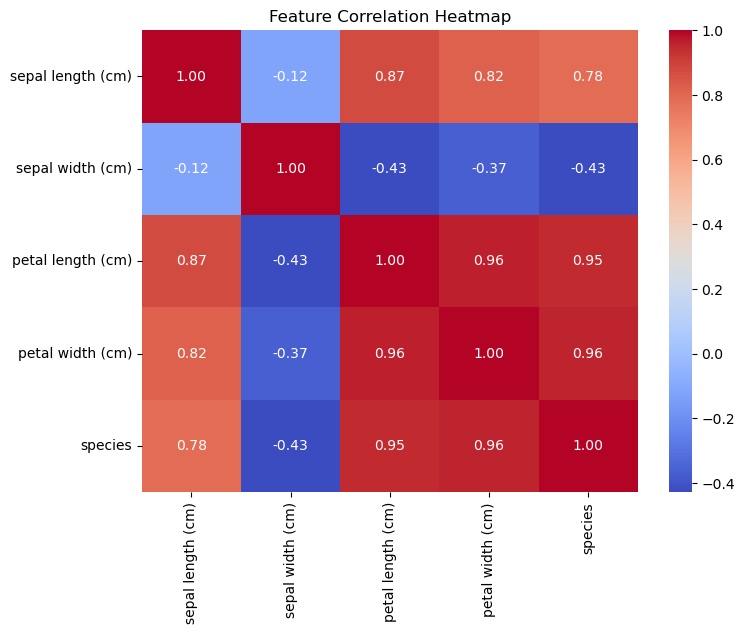

In [7]:
sns.pairplot(df, hue="species", diag_kind="kde")
plt.suptitle("Pairplot of Iris Features by Species", y=1.02)
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [9]:
svm_clf = SVC(kernel="rbf", gamma="scale", C=1.0)
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)
print("Classification Accuracy:", accuracy_score(y_test, y_pred))

Classification Accuracy: 1.0


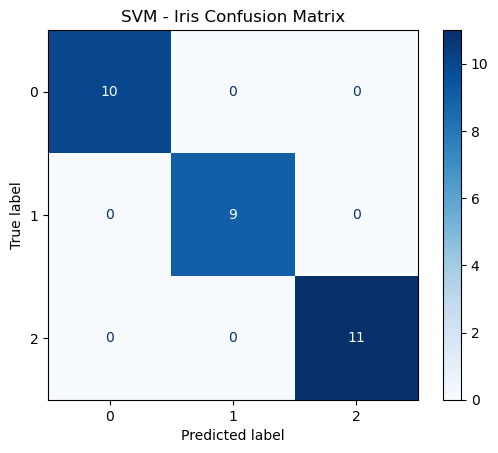

In [10]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_enc.classes_)
disp.plot(cmap="Blues")
plt.title("SVM - Iris Confusion Matrix")
plt.show()

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

scores = cross_val_score(svm_clf, X_scaled, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV accuracy:", scores.mean())

Cross-validation scores: [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
Mean CV accuracy: 0.9666666666666666


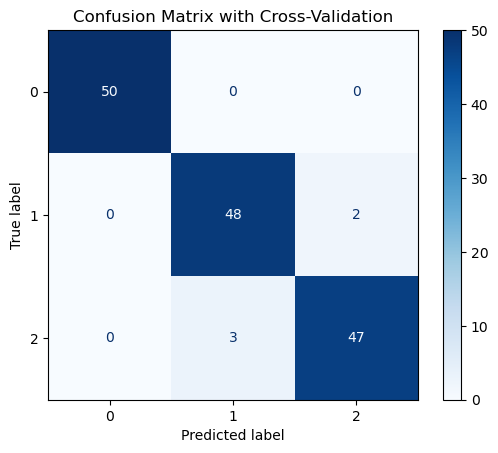

In [21]:
y_pred_cv = cross_val_predict(svm_clf, X, y, cv=5) 

cm = confusion_matrix(y, y_pred_cv)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_clf.classes_)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix with Cross-Validation")
plt.show()

In [11]:
sample = [[5.5, 3.0, 4.2, 1.3]]
sample_scaled = scaler.transform(sample)
pred_species = svm_clf.predict(sample_scaled)[0]
print("Predicted species:", label_enc.inverse_transform([pred_species])[0])

Predicted species: 1


In [13]:
X_reg = df.drop(["petal length (cm)","species"], axis=1)
y_reg = df["petal length (cm)"]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

reg_model = LinearRegression()
reg_model.fit(X_train_r, y_train_r)

y_pred_r = reg_model.predict(X_test_r)

In [14]:
print("Regression RMSE:", np.sqrt(mean_squared_error(y_test_r, y_pred_r)))
print("Regression R²:", r2_score(y_test_r, y_pred_r))

Regression RMSE: 0.3605776758395158
Regression R²: 0.9603293155857664


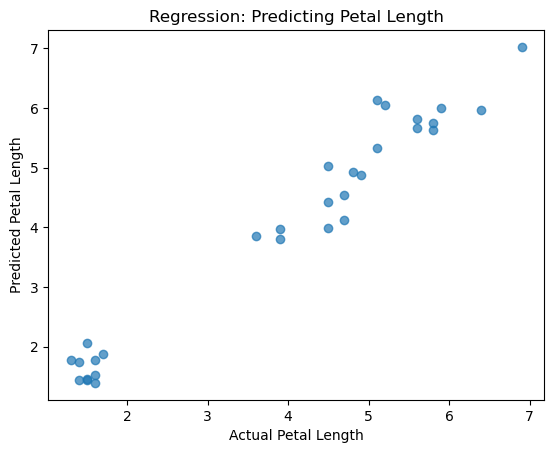

In [15]:
plt.scatter(y_test_r, y_pred_r, alpha=0.7)
plt.xlabel("Actual Petal Length")
plt.ylabel("Predicted Petal Length")
plt.title("Regression: Predicting Petal Length")
plt.show()

In [33]:
import pickle

model = SVC(kernel="linear", probability=True)
model.fit(X_train, y_train)

with open("iris_svm_model.pkl", "wb") as f:
    pickle.dump(model, f)